## Model - Light GBM

**Light GBM is a gradient boosting framework that uses tree based learning algorithm.**

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.
Below diagrams explain the implementation of LightGBM and other boosting algorithms.


* Explains how LightGBM works

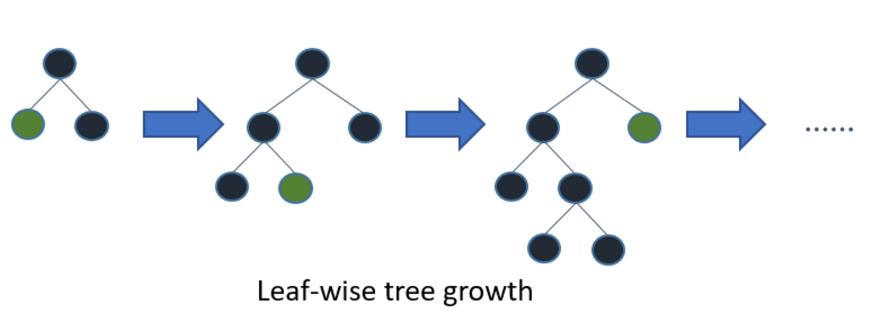

* How other boosting algorithm works

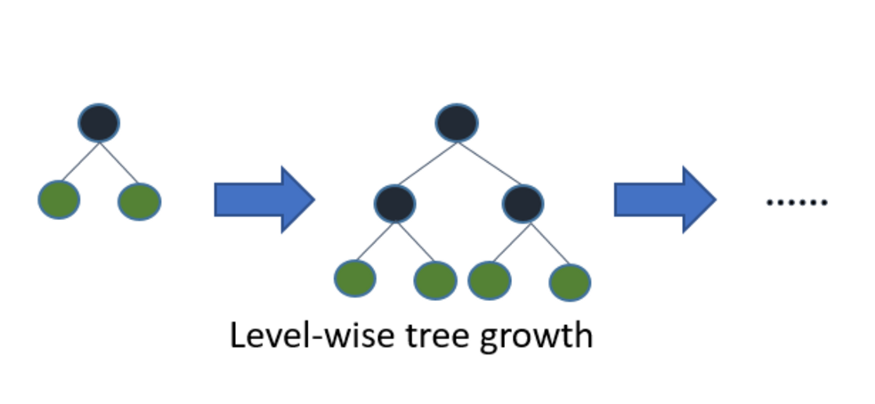

# Implementation of Light GBM:

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load DataFrame 

In [2]:
df = pd.read_csv('DataFrame.csv')

In [3]:
df.head()

,PRICE,MFG_YEAR,CAR_AGE,MILEAGE,CAR_DRIVEN_PER_YEAR,STATE_ENCODED,MAKE_ENCODED,MODEL_ENCODED,CITY_ENCODED,STATE_IMPORTANCE_ENCODED,CITY_IMPORTANCE_ENCODED,OLD_OR_NEW_ENCODED,CAR_USAGE_LEVEL_ENCODED
0,8995,2014,8,10.483606,8.404164,10.058539,10.051761,16240.052632,2.300572,9.996560,9.960262,10.008981,10.117699
1,10888,2013,9,9.883591,7.686366,10.005756,10.051761,17214.413636,2.298535,9.940469,9.960262,10.008981,10.117699
2,8995,2013,9,10.796530,8.599306,10.058539,10.051761,16240.052632,2.300572,9.996560,9.960262,10.008981,9.760701
3,10999,2014,8,10.594683,8.515241,9.954690,10.051761,17214.413636,2.302840,9.940469,9.957230,10.008981,10.117699
4,14799,2016,6,10.005232,8.213472,9.964482,10.051761,22464.898396,2.288573,9.950288,9.960262,10.008981,10.117699


## Spliting the Dataset into Train and Test sub datasets

In [4]:
# Imorting Library
from sklearn.model_selection import train_test_split

In [5]:
# X is a varibale for all independent features
X= df.drop(['PRICE'],axis=1)
print(X)
X.shape

         MFG_YEAR  CAR_AGE    MILEAGE  CAR_DRIVEN_PER_YEAR  STATE_ENCODED  \
0            2014        8  10.483606             8.404164      10.058539   
1            2013        9   9.883591             7.686366      10.005756   
2            2013        9  10.796530             8.599306      10.058539   
3            2014        8  10.594683             8.515241       9.954690   
4            2016        6  10.005232             8.213472       9.964482   
...           ...      ...        ...                  ...            ...   
2068367      2017        5   3.218876             1.609438       9.971045   
2068368      2017        5   2.302585             0.693147       9.968618   
2068369      2018        4   7.824046             6.437752       9.971045   
2068370      2017        5   8.071219             6.461781       9.971045   
2068371      2017        5   9.029058             7.419620       9.968618   

         MAKE_ENCODED  MODEL_ENCODED  CITY_ENCODED  STATE_IMPORTANCE_ENCODE

(2068372, 12)

In [6]:
# Y is a Varible for dependent feature 
Y = df[['PRICE']]
print(Y)
Y.shape

         PRICE
0         8995
1        10888
2         8995
3        10999
4        14799
...        ...
2068367  79900
2068368  80895
2068369  68755
2068370  72260
2068371  60240

[2068372 rows x 1 columns]


(2068372, 1)

In [7]:
#Splitting the Data into Training and Testing data
# Train and testing the data
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=100)

# Test size is taken 20% of total Dataset , Whereas Train Size is 80% of total dataset

In [8]:
'''import lightgbm as lgb
regressor = lgb.'''

'import lightgbm as lgb\nregressor = lgb.'

In [9]:
# importing Light gbm regressor from its library
from lightgbm import LGBMRegressor

# importing RandomizedSearchCV for HyperParameter Optimization/tuning 
from sklearn.model_selection import RandomizedSearchCV

# Assigning object (LGBMRegressor) a variable
Lgmr = LGBMRegressor()

## HyperParameter Optimization 

While model building, we need to select the appropriate parameters to get the best accuracy. As there are many numbers of Hyperparameter in Light GBM it's not easy to select the best parameters.

So for that, we use the HyperParameter optimization using RandomSearchCV. 

In [10]:
# HyperParameter Optimization..

# We provide a list for each parameter which has some appropriate value out of which RandomSearchCV uses the best parameter
# which can be given to the model.

n_estimators = [100, 500, 900, 1100, 1500]
num_leaves = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search by using Key-Value pairs or dictionary....
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'num_leaves': num_leaves,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    }

In [11]:
# Set up the random search with 4-fold cross validation

random_cv = RandomizedSearchCV(estimator=Lgmr,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=5,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

This step may take some time.

In [12]:
# fitting the hyperparameters to x_train and y_train

random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] Unknown parameter: booster


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=5, n_jobs=4,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500],
                                        'num_leaves': [100, 500, 900, 1100,
                                                       1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

Taking out the best estimators used in randomsearchcv

In [13]:
random_cv.best_estimator_

LGBMRegressor(booster='gbtree', max_depth=10, min_child_weight=3,
              n_estimators=900, num_leaves=100)

Taking out the best parameters used in randomsearchcv

In [14]:
random_cv.best_params_

{'num_leaves': 100,
 'n_estimators': 900,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.1,
 'booster': 'gbtree'}

## Model Building

Giving the above best parameters to LGBMRegressor object

In [15]:
Lgmr = LGBMRegressor(num_leaves = 100,n_estimators = 900,min_child_weight = 3,max_depth = 10,
                     learning_rate =  0.1,booster = 'gbtree')

Fitting the  Model 

In [16]:
Lgmr.fit(x_train,y_train)

LGBMRegressor(booster='gbtree', max_depth=10, min_child_weight=3,
              n_estimators=900, num_leaves=100)

## Model Evaluation based on Test Set

In [17]:
y_pred = Lgmr.predict(x_test)

In [18]:
# Importing library for evaluation 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## Pridicting the Accuracy

In [19]:
Lgmr.score(x_test,y_test)

0.9187715846198523

In [20]:
# Importing another library for evaluation of the regressor model 

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

## Predicting R2 score :
The predicted R-squared indicates how well a regression model predicts responses for new observations. This statistic helps you determine when the model fits the original data but is less capable of providing valid predictions for new observations

In [21]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9187715846198523


As we can see that the model has a R2 score = .918 which is a good score afterall
* We can say that our model is 91% efficient

## Predicting RMSE: 
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [22]:
# Importing another library for 'mean squared error' of the regressor model 

from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_test, y_pred, squared=False) # RMSE value 

3810.1120210729937

## Predicting Mean squared error:
Mean squared error (MSE) is the most commonly used loss function for regression. The loss is the mean overseen data of the squared differences between true and predicted values, or writing it as a formula.

In [24]:
MSE=(mean_squared_error(y_test,y_pred))
print('The Mean Squared Error is {}'.format(MSE))

The Mean Squared Error is 14516953.613124931


## Predicting Mean absolute error: 
In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement.

In [25]:
MAE=mean_absolute_error(y_test,y_pred)
print("The Mean Absolute Error is {}".format(MAE))

The Mean Absolute Error is 2097.374853211409


In [26]:
import pickle

In [27]:
filename = 'LightGBM_Price_Prediction'
pickle.dump(Lgmr,open(filename, 'wb'))

In [28]:
loaded_model = pickle.load(open(filename,'rb'))

In [29]:
loaded_model.predict(x_test)

array([12765.09293438, 11865.72157198, 14074.80693314, ...,
       23332.72404927, 14595.63929651, 31315.98491492])